In [1]:
# import library

import os
from shutil import copy
import xml.etree.ElementTree as ET
import xml
from xml.dom import minidom
import cv2

In [34]:
datapath = '../../dataset/Annotations'
xmlls = os.listdir(datapath)
imagepath = '../../dataset/JPEGImages'
VOC_CLASS_NAMES = [
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
    "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
    "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]
VOC_CLASS_NAMES_COCOFIED = [
    "airplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
    "chair", "cow", "dining table", "dog", "horse", "motorcycle", "person",
    "potted plant", "sheep", "couch", "train", "tv"
]

VOCclass = set(VOC_CLASS_NAMES).union(set(VOC_CLASS_NAMES_COCOFIED))


In [42]:
count = 0
for singleXml in xmlls:
    xmlname = os.path.join(datapath,singleXml)
    doc = ET.parse(xmlname)
    root = doc.getroot()
    imagename = root.find('filename').text
    filepath = os.path.join('../../dataset/JPEGImages',imagename)
    objects = root.iter('object')

    for annotation in objects:
        name = annotation.find('name').text
        bndbox = annotation.find('bndbox')

        # x_l = int(bndbox.find('ymin').text)
        # y_b = int(bndbox.find('xmin').text)
        # x_r = int(bndbox.find('ymax').text)
        # y_u = int(bndbox.find('xmax').text)

        if name in VOC_CLASS_NAMES_COCOFIED:
            count = count + 1

print(count)


KeyboardInterrupt: 

In [39]:
len(xmlls)

154444

In [43]:
singleXml = xmlls[100]

xmlname = os.path.join(datapath,singleXml)
doc = ET.parse(xmlname)
root = doc.getroot()
xmlstr = minidom.parseString(ET.tostring(root)).toprettyxml(indent="   ")
print(xmlstr)

<?xml version="1.0" ?>
<annotation>
   <filename>000000379914.jpg</filename>
   <size>
      <width>612</width>
      <height>612</height>
      <depth>3</depth>
   </size>
   <object>
      <name>dining table</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>2</xmin>
         <ymin>508</ymin>
         <xmax>613</xmax>
         <ymax>611</ymax>
      </bndbox>
   </object>
   <object>
      <name>person</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>1</xmin>
         <ymin>9</ymin>
         <xmax>613</xmax>
         <ymax>557</ymax>
      </bndbox>
   </object>
   <object>
      <name>pizza</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>203</xmin>
         <ymin>427</ymin>
         <xmax>560</xmax>
         <ymax>522</ymax>
      </bndbox>
   </object>
   <object>
      <name>fork</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>474</xmin>
         <ymin>385</ymin>
         <xmax>572</xmax>
         <ymax>44

In [31]:
xmlstr = minidom.parseString(ET.tostring(root)).toprettyxml(indent="   ")
print(xmlstr)

<?xml version="1.0" ?>
<annotation>
   <filename>000000396762.jpg</filename>
   <size>
      <width>640</width>
      <height>471</height>
      <depth>3</depth>
   </size>
   <object>
      <name>airplane</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>31</xmin>
         <ymin>193</ymin>
         <xmax>489</xmax>
         <ymax>422</ymax>
      </bndbox>
   </object>
   <object>
      <name>person</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>149</xmin>
         <ymin>315</ymin>
         <xmax>197</xmax>
         <ymax>447</ymax>
      </bndbox>
   </object>
   <object>
      <name>person</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>83</xmin>
         <ymin>319</ymin>
         <xmax>124</xmax>
         <ymax>449</ymax>
      </bndbox>
   </object>
   <object>
      <name>person</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>586</xmin>
         <ymin>273</ymin>
         <xmax>638</xmax>
         <ymax

In [6]:
annotation = next(objects)

name = annotation.find('name').text
bndbox = annotation.find('bndbox')


x_l = int(bndbox.find('ymin').text)
y_b = int(bndbox.find('xmin').text)
x_r = int(bndbox.find('ymax').text)
y_u = int(bndbox.find('xmax').text)



In [7]:
src = cv2.imread(filepath)
crop = src[x_l:x_r,y_b:y_u,:]

y = y_u-y_b
x = x_r-x_l
length = max(x, y)

top = int(length/2 - x/2)
bottom = int(length/2 - x/2)
left = int(length/2 - y/2)
right = int(length/2 - y/2)

borderType = cv2.BORDER_CONSTANT
crop = cv2.copyMakeBorder(crop, top, bottom, left, right, borderType)
crop = cv2.resize(crop,(256,256))

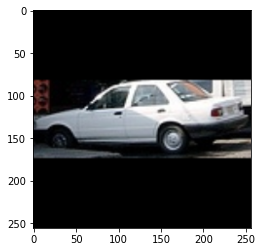

In [8]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

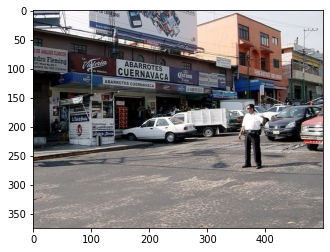

In [9]:
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

In [7]:
xmlstr = minidom.parseString(ET.tostring(root)).toprettyxml(indent="   ")
print(xmlstr)

<?xml version="1.0" ?>
<annotation>
   <filename>000000435389.jpg</filename>
   <size>
      <width>640</width>
      <height>480</height>
      <depth>3</depth>
   </size>
   <object>
      <name>tv</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>356</xmin>
         <ymin>36</ymin>
         <xmax>524</xmax>
         <ymax>200</ymax>
      </bndbox>
   </object>
   <object>
      <name>potted plant</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>1</xmin>
         <ymin>78</ymin>
         <xmax>315</xmax>
         <ymax>414</ymax>
      </bndbox>
   </object>
   <object>
      <name>clock</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>144</xmin>
         <ymin>36</ymin>
         <xmax>259</xmax>
         <ymax>148</ymax>
      </bndbox>
   </object>
   <object>
      <name>vase</name>
      <difficult>0</difficult>
      <bndbox>
         <xmin>138</xmin>
         <ymin>281</ymin>
         <xmax>195</xmax>
         <ymax>412</

In [9]:
annotation

<Element 'object' at 0x7f418b6e07d0>

In [10]:
xmlstr = minidom.parseString(ET.tostring(annotation)).toprettyxml(indent="   ")
print(xmlstr)

<?xml version="1.0" ?>
<object>
   <name>bowl</name>
   <difficult>0</difficult>
   <bndbox>
      <xmin>322</xmin>
      <ymin>349</ymin>
      <xmax>381</xmax>
      <ymax>391</ymax>
   </bndbox>
</object>

